In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

In [65]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [6]:
X  = [[1,0.3,0.4],[-0.5,1,0],[1,0,1],[0.5,0.5,0.5],[0.3,0.6,0],[0,0.9,0.2],[0.3,1,0.9],[0.2,0.7,0.8],
     [0.8,0.7,0.2]]
Y = [0.3,0,0.2,-1,2,0.7,1.3,-1.4,0]
X = pd.DataFrame(X)
mod_reg  = tree.DecisionTreeRegressor(max_depth = 2)
mod_reg

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [7]:
mod_reg_fit = mod_reg.fit(X,Y)
mod_reg_fit.score(X,Y)

0.7201974183750949

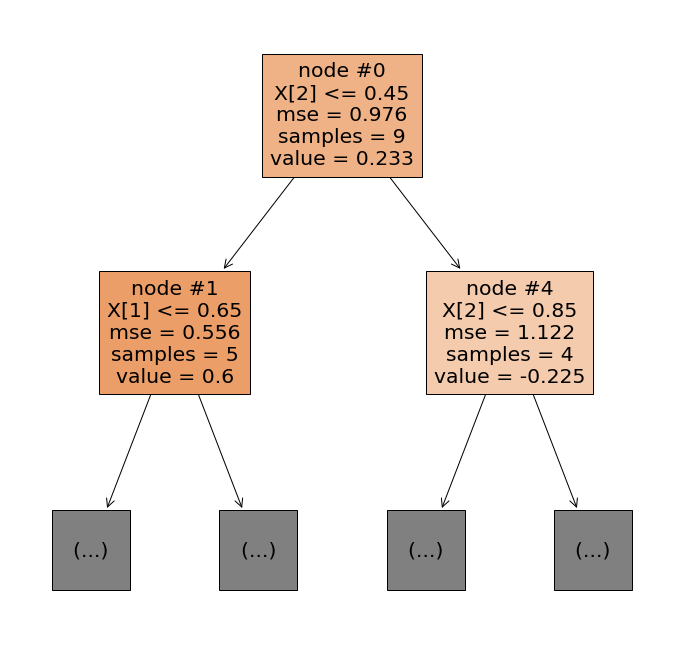

In [13]:
plt.figure(figsize = (12,12))
tree.plot_tree(mod_reg_fit, filled = True, node_ids = True, max_depth = 1)
plt.show()

In [14]:
Y_predict = mod_reg_fit.predict(X)
Y_predict

array([ 1.15      ,  0.23333333,  0.75      , -1.2       ,  1.15      ,
        0.23333333,  0.75      , -1.2       ,  0.23333333])

In [16]:
RSS = np.sum((Y - Y_predict)*(Y - Y_predict))
MSE = np.mean((Y - Y_predict)*(Y - Y_predict))
RMSE = np.sqrt(MSE)
print(RSS)
print(MSE)
print(RMSE)

2.4566666666666666
0.27296296296296296
0.5224585753559443


In [17]:
for j in np.arange(20)+2:
    mod_reg = tree.DecisionTreeRegressor(max_depth = j)
    mod_reg_fit = mod_reg.fit(X,Y)
    print("max_depth = ", j, "Score = ", mod_reg_fit.score(X,Y))

max_depth =  2 Score =  0.7201974183750949
max_depth =  3 Score =  0.9720956719817768
max_depth =  4 Score =  1.0
max_depth =  5 Score =  1.0
max_depth =  6 Score =  1.0
max_depth =  7 Score =  1.0
max_depth =  8 Score =  1.0
max_depth =  9 Score =  1.0
max_depth =  10 Score =  1.0
max_depth =  11 Score =  1.0
max_depth =  12 Score =  1.0
max_depth =  13 Score =  1.0
max_depth =  14 Score =  1.0
max_depth =  15 Score =  1.0
max_depth =  16 Score =  1.0
max_depth =  17 Score =  1.0
max_depth =  18 Score =  1.0
max_depth =  19 Score =  1.0
max_depth =  20 Score =  1.0
max_depth =  21 Score =  1.0


In [22]:
data = pd.read_csv("/Users/apoghosyan/Dropbox/AUA_ML_2020/Data/Hitters.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      263 non-null    f

In [24]:
data_short = data.drop(["Unnamed: 0","League","Division",'NewLeague'], axis = 1)
data_short = data_short.dropna()
data_short.shape

(263, 17)

In [25]:
X = data_short.drop(["Salary"], axis = 1)
Y = data_short[["Salary"]]

0.6687353240683862


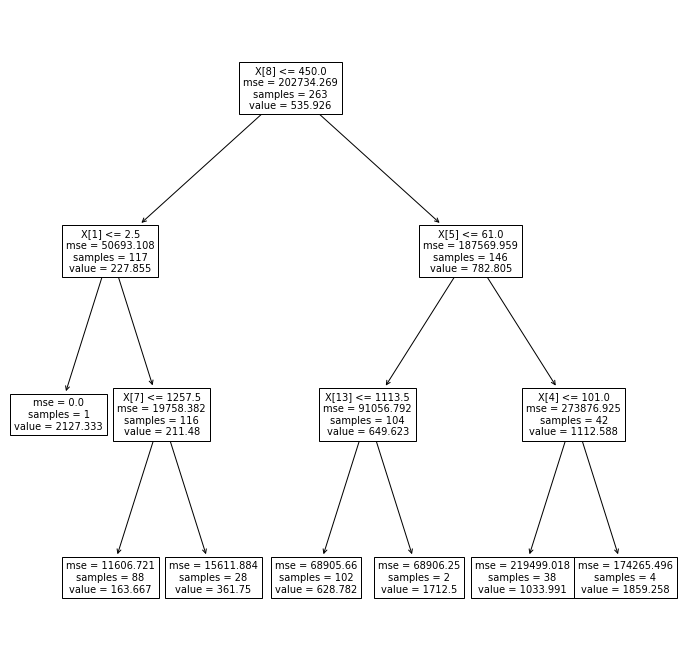

In [27]:
mod_reg = tree.DecisionTreeRegressor(max_depth = 3)
mod_reg_fit = mod_reg.fit(X,Y)
print(mod_reg.score(X,Y))

plt.figure(figsize = (12,12))
tree.plot_tree(mod_reg_fit)
plt.show()

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [30]:
score = np.array([])
size = Y_test.shape[0]
for j in np.arange(20)+2:
    mod_reg = tree.DecisionTreeRegressor(max_depth = j)
    mod_reg_fit = mod_reg.fit(X_train,Y_train)
    Y_predict = mod_reg_fit.predict(X_test)
    mse = np.mean((Y_predict - np.array(Y_test).reshape(size,))*(Y_predict - np.array(Y_test).reshape(size,)))
    score = np.append(score, mse)
    print("max_depth = ", j, "MSE = ", mse)

max_depth =  2 MSE =  155543.82574229327
max_depth =  3 MSE =  119241.60411921608
max_depth =  4 MSE =  120284.823640874
max_depth =  5 MSE =  118989.95538805595
max_depth =  6 MSE =  117938.49372898837
max_depth =  7 MSE =  127781.36950864001
max_depth =  8 MSE =  128364.59855582303
max_depth =  9 MSE =  129583.59686227443
max_depth =  10 MSE =  136247.6481639086
max_depth =  11 MSE =  137515.31567019253
max_depth =  12 MSE =  132531.0382357748
max_depth =  13 MSE =  121793.57187801467
max_depth =  14 MSE =  141963.45666933962
max_depth =  15 MSE =  141838.24751315094
max_depth =  16 MSE =  121647.46980386793
max_depth =  17 MSE =  146056.21586781132
max_depth =  18 MSE =  128423.57572858491
max_depth =  19 MSE =  141105.40563684906
max_depth =  20 MSE =  143608.13348539625
max_depth =  21 MSE =  130995.72949428303


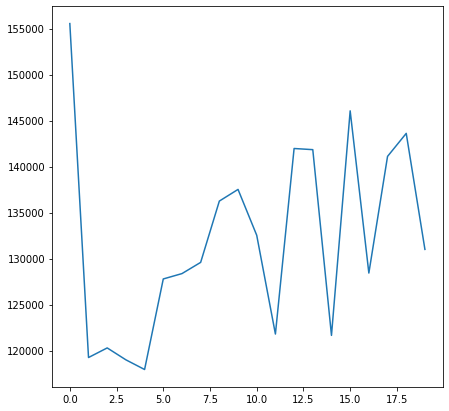

5

In [31]:
plt.figure(figsize = (7,7))
plt.plot(score)
plt.show()
max_depth = np.argmin(score)+1
max_depth

In [32]:
mod_reg = tree.DecisionTreeRegressor(max_depth = max_depth)
mod_reg_fit = mod_reg.fit(X,Y)
mod_reg_fit.score(X,Y)

0.8094903728310278

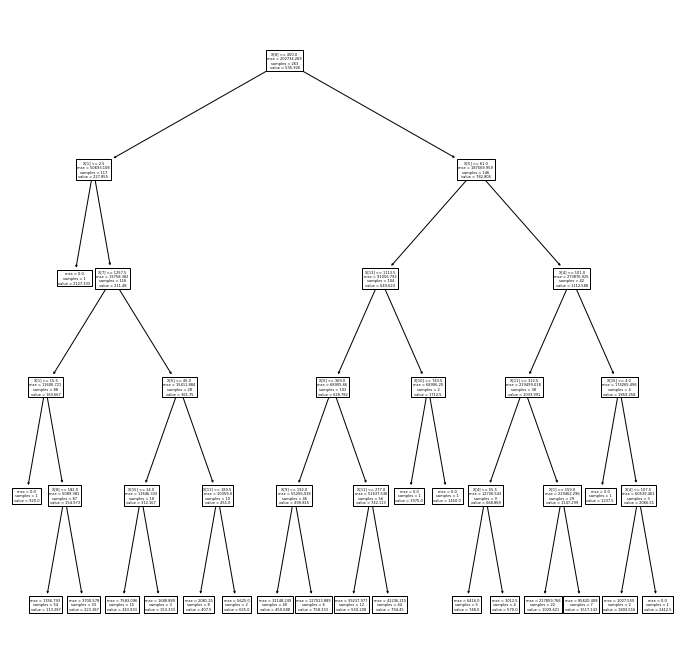

In [33]:
plt.figure(figsize = (12,12))
tree.plot_tree(mod_reg_fit)
plt.show()

In [34]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/Users/apoghosyan/Library/Python/3.7/lib/python/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


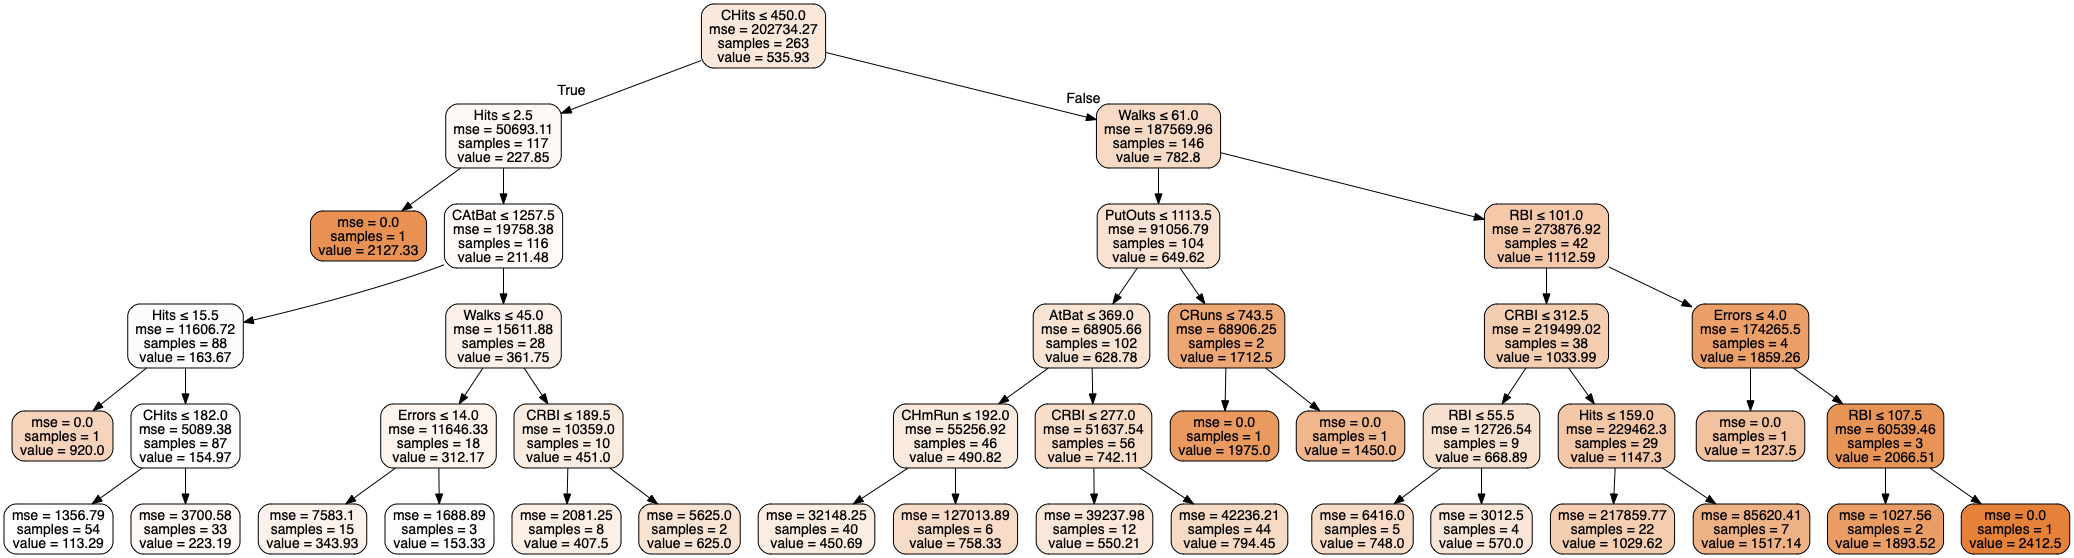

In [42]:
dot_data = StringIO()

export_graphviz(mod_reg_fit, 
                out_file = dot_data,  
                filled = True, 
                rounded = True,
                special_characters = True, 
                feature_names = X.columns,
                precision = 2)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png(), width = 1100, height = 1100)

In [45]:
X,Y = make_regression(n_samples = 10000, n_features = 12, 
                     n_informative = 10)
print(X.shape)
print(Y.shape)

(10000, 12)
(10000,)


In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)
print(X_train.shape)
print(Y_train.shape)

(7000, 12)
(7000,)


In [49]:
score = np.array([])
for j in np.arange(20) + 2:
    mod_reg = tree.DecisionTreeRegressor(max_depth = j)
    mod_cv = cross_val_score(mod_reg, X_train,Y_train,cv = 10)
    score = np.append(score, np.mean(mod_cv))
    print("j->", j, "Mean->", np.mean(mod_cv))
param = np.argmax(score) + 2
param

j-> 2 Mean-> 0.3254510810764844
j-> 3 Mean-> 0.42904035237512544
j-> 4 Mean-> 0.4904873492318119
j-> 5 Mean-> 0.5518695400059447
j-> 6 Mean-> 0.5997862977007005
j-> 7 Mean-> 0.6375830256800639
j-> 8 Mean-> 0.6687364238867837
j-> 9 Mean-> 0.6968607433331624
j-> 10 Mean-> 0.6992532539353886
j-> 11 Mean-> 0.704596953364607
j-> 12 Mean-> 0.7065712989899753
j-> 13 Mean-> 0.704527040920385
j-> 14 Mean-> 0.7016703109941627
j-> 15 Mean-> 0.6957659252057484
j-> 16 Mean-> 0.6955620657978537
j-> 17 Mean-> 0.7004237030593647
j-> 18 Mean-> 0.6977804078198291
j-> 19 Mean-> 0.7024300034786246
j-> 20 Mean-> 0.7007031797893585
j-> 21 Mean-> 0.6975826705916273


12

In [50]:
mod_reg = tree.DecisionTreeRegressor(max_depth = param)
mod_reg_fit = mod_reg.fit(X_train,Y_train)
error = mod_reg_fit.score(X_test,Y_test)
print(param)
print("Error - > ", error)

12
Error - >  0.7162671024979267


In [55]:
score = np.array([])
for j in np.arange(8) + 2:
    mod_reg = GradientBoostingRegressor(max_depth = j)
    mod_cv = cross_val_score(mod_reg, np.array(X_train),np.array(Y_train).ravel(), 
                             cv = 10)
    score = np.append(score, np.mean(mod_cv))
    print("j->", j, "Mean->", np.mean(mod_cv))
param = np.argmax(score) + 2
param

j-> 2 Mean-> 0.9210065033699119
j-> 3 Mean-> 0.9567140566301774
j-> 4 Mean-> 0.9675027946134058
j-> 5 Mean-> 0.9687125735065903
j-> 6 Mean-> 0.9645714874624464
j-> 7 Mean-> 0.9594445646999352
j-> 8 Mean-> 0.9507866591852139
j-> 9 Mean-> 0.9390972880981054


5

In [61]:
score = np.array([])
for j in np.arange(20) + 2:
    mod_reg = RandomForestRegressor(max_depth = j,
                                             max_features = 3,
                                             n_estimators = 100)
    mod_cv = cross_val_score(mod_reg, np.array(X_train),np.array(Y_train).ravel(), 
                             cv = 10)
    score = np.append(score, np.mean(mod_cv))
    print("j->", j, "Mean->", np.mean(mod_cv))
param = np.argmax(score) + 2
param

j-> 2 Mean-> 0.3553650026101537
j-> 3 Mean-> 0.47770995044043263
j-> 4 Mean-> 0.581364824494445
j-> 5 Mean-> 0.6606332364551302
j-> 6 Mean-> 0.72264046187002
j-> 7 Mean-> 0.7735106755134341
j-> 8 Mean-> 0.8102192404900508
j-> 9 Mean-> 0.836856918489316
j-> 10 Mean-> 0.8555984205623673
j-> 11 Mean-> 0.8687011280555842
j-> 12 Mean-> 0.8746987710373325
j-> 13 Mean-> 0.8818218526462956
j-> 14 Mean-> 0.8842730813165955
j-> 15 Mean-> 0.8862552218340154
j-> 16 Mean-> 0.8862769927646557
j-> 17 Mean-> 0.8875289699449371
j-> 18 Mean-> 0.8881453445900285
j-> 19 Mean-> 0.8876608822675985
j-> 20 Mean-> 0.887100273528555
j-> 21 Mean-> 0.8881235051558786


18

In [63]:
mod_reg_rf = RandomForestRegressor(max_depth = param, oob_score = True)
mod_reg_rf_fit = mod_reg_rf.fit(X_train,Y_train)
error = mod_reg_rf_fit.score(X_test,Y_test)
print(param)
print("Error - > ", error)

18
Error - >  0.9150155582458173


In [64]:
mod_reg_rf.oob_score_

0.9062768661432781

In [66]:
score = np.array([])
for j in np.arange(20) + 1:
    mod_reg = AdaBoostRegressor(tree.DecisionTreeRegressor(max_depth = j), 
                                         n_estimators = 500,
                                        learning_rate = 1)
    mod_cv = cross_val_score(mod_reg, np.array(X_train),np.array(Y_train).ravel(), 
                             cv = 5)
    score = np.append(score, np.mean(mod_cv))
    print("j->", j, "Mean->", np.mean(mod_cv))
param = np.argmax(score) + 1
param

j-> 1 Mean-> 0.2559333458515189
j-> 2 Mean-> 0.7933939962099517
j-> 3 Mean-> 0.8724418262121297
j-> 4 Mean-> 0.8859792720946448
j-> 5 Mean-> 0.8939042330800018
j-> 6 Mean-> 0.8987678358917129
j-> 7 Mean-> 0.9012566980718141
j-> 8 Mean-> 0.9026343226186224
j-> 9 Mean-> 0.9031073195089565
j-> 10 Mean-> 0.9049902352657011
j-> 11 Mean-> 0.9070726545759211
j-> 12 Mean-> 0.9093163451342956
j-> 13 Mean-> 0.9119545888386534
j-> 14 Mean-> 0.9130292132997944
j-> 15 Mean-> 0.9142097599262582
j-> 16 Mean-> 0.914410573215623
j-> 17 Mean-> 0.9148970451822092
j-> 18 Mean-> 0.915389367317976
j-> 19 Mean-> 0.9151728697157366
j-> 20 Mean-> 0.914861359324236


18

In [67]:
mod_reg_ada = AdaBoostRegressor(tree.DecisionTreeRegressor(max_depth = 7), 
                                         n_estimators = 500)
mod_reg_ada.fit(X_train,Y_train)
error = mod_reg_ada.score(X_test,Y_test)
print("Error - > ", error)

Error - >  0.9098142910502154
